In [9]:
from IPython.display import Image

## fsm

- finite：有限，描述的是状态是有限的
- state：状态，fsm：用于维护状态的读写，当前状态（读），
    - 基本都是symbolic（符号化的）
- 如果整体是一个circle，则将用于不会停止，即某种意义上的`永动机`
    - 比如交通灯

In [7]:
# !pip install transitions

## 两状态成环的开关

- 关 -> 开 -> 关

In [94]:
import time

def off_handler(state):
    print('off')
    return 'on'

def on_handler(state):
    print('on')
    return 'off'

def start_hander(state):
    return 'on'

class SimpleFSM:
    def __init__(self):
        self.handlers = {}
        self.handlers['on'] = on_handler
        self.handlers['off'] = off_handler
        self.handlers['start'] = start_hander
        
    def run(self, init):
        handler = self.handlers[init]
        state = init
        while True:
            state = handler(state)
            handler = self.handlers[state]
            time.sleep(1)

In [95]:
fsm = SimpleFSM()
fsm.run('start')

on
off
on
off
on


KeyboardInterrupt: 

## traffic light

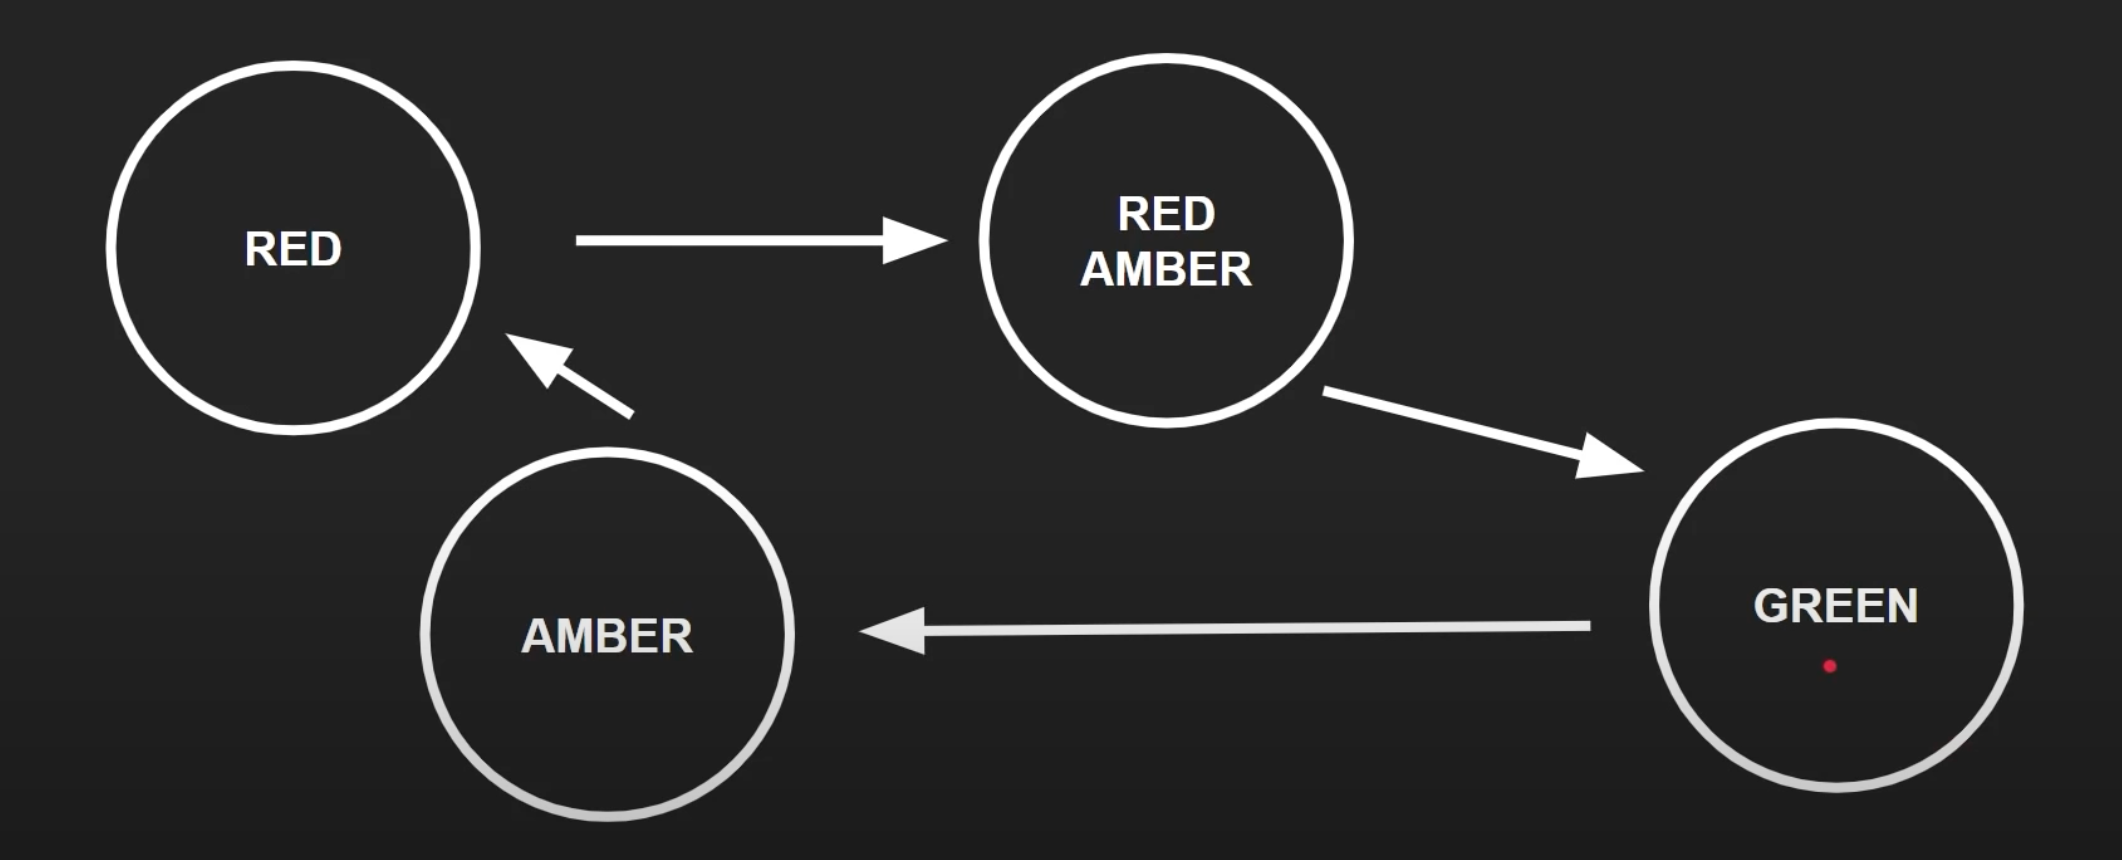

In [11]:
Image('../imgs/traffic_lights.png', width=500)

In [8]:
class SimpleFSM:
    def __init__(self):
        self.handlers = {}
        
    # build process 
    def add_state(self, name, handler):
        self.handlers[name] = handler
        
    # running process
    def run(self, init, cargo):
        handler = self.handlers[init]
        while True:
            new_state, cargo = handler(cargo)
            if new_state == 'END':
                print('END reached')
                break
            handler = self.handlers[new_state]

In [12]:
def state_start_handler(cargo):
    print('start')
    return ('RED', cargo)
def state_red_handler(cargo):
    print('RED')
    return ('RED_AMBER', cargo)
def state_red_amber_handler(cargo):
    print('RED & AMBER')
    return ('GREEN', cargo)
def state_green_handler(cargo):
    print('GREEN')
    return ('AMBER', cargo)
def state_amber_handler(cargo):
    print('AMBER')
    cargo -= 1
    if cargo > 0:
        return ('RED', cargo)
    return ('END', cargo)

In [15]:
fsm = SimpleFSM()
fsm.add_state('START', state_start_handler)
fsm.add_state('RED', state_red_handler)
fsm.add_state('RED_AMBER', state_red_amber_handler)
fsm.add_state('GREEN', state_green_handler)
fsm.add_state('AMBER', state_amber_handler)

In [16]:
fsm.run('START', 3)

start
RED
RED & AMBER
GREEN
AMBER
RED
RED & AMBER
GREEN
AMBER
RED
RED & AMBER
GREEN
AMBER
END reached


## Collatz Conjecture（Collatz Conjecture）

- 奇偶归一猜想、3n + 1猜想、冰雹猜想
    - 每一个正整数，如果他是奇数，就对他乘以3，再加1，如果是偶数则对他除以2，最终都能得到1

In [27]:
class SimpleFSM:
    def __init__(self):
        self.handlers = {}
        
    # build process 
    def add_state(self, name, handler):
        self.handlers[name] = handler
        
    # running process
    def run(self, n):
        if n % 2 == 0:
            handler = self.handlers['EVEN']
        else:
            handler = self.handlers['ODD']
        while True:
            n = handler(n)
            if n == 1:
                print('END(1) reached')
                break
                
            if n % 2 == 0:
                handler = self.handlers['EVEN']
            else:
                handler = self.handlers['ODD']

In [29]:
def even_handler(x):
    print('even', x)
    return x//2
def odd_handler(x):
    print('odd', x)
    return 3*x+1

In [30]:
fsm = SimpleFSM()
fsm.add_state('EVEN', even_handler)
fsm.add_state('ODD', odd_handler)

In [31]:
fsm.run(12)

even 12
even 6
odd 3
even 10
odd 5
even 16
even 8
even 4
even 2
END(1) reached


In [32]:
fsm.run(11)

odd 11
even 34
odd 17
even 52
even 26
odd 13
even 40
even 20
even 10
odd 5
even 16
even 8
even 4
even 2
END(1) reached


In [33]:
fsm.run(18)

even 18
odd 9
even 28
even 14
odd 7
even 22
odd 11
even 34
odd 17
even 52
even 26
odd 13
even 40
even 20
even 10
odd 5
even 16
even 8
even 4
even 2
END(1) reached


## 固液气

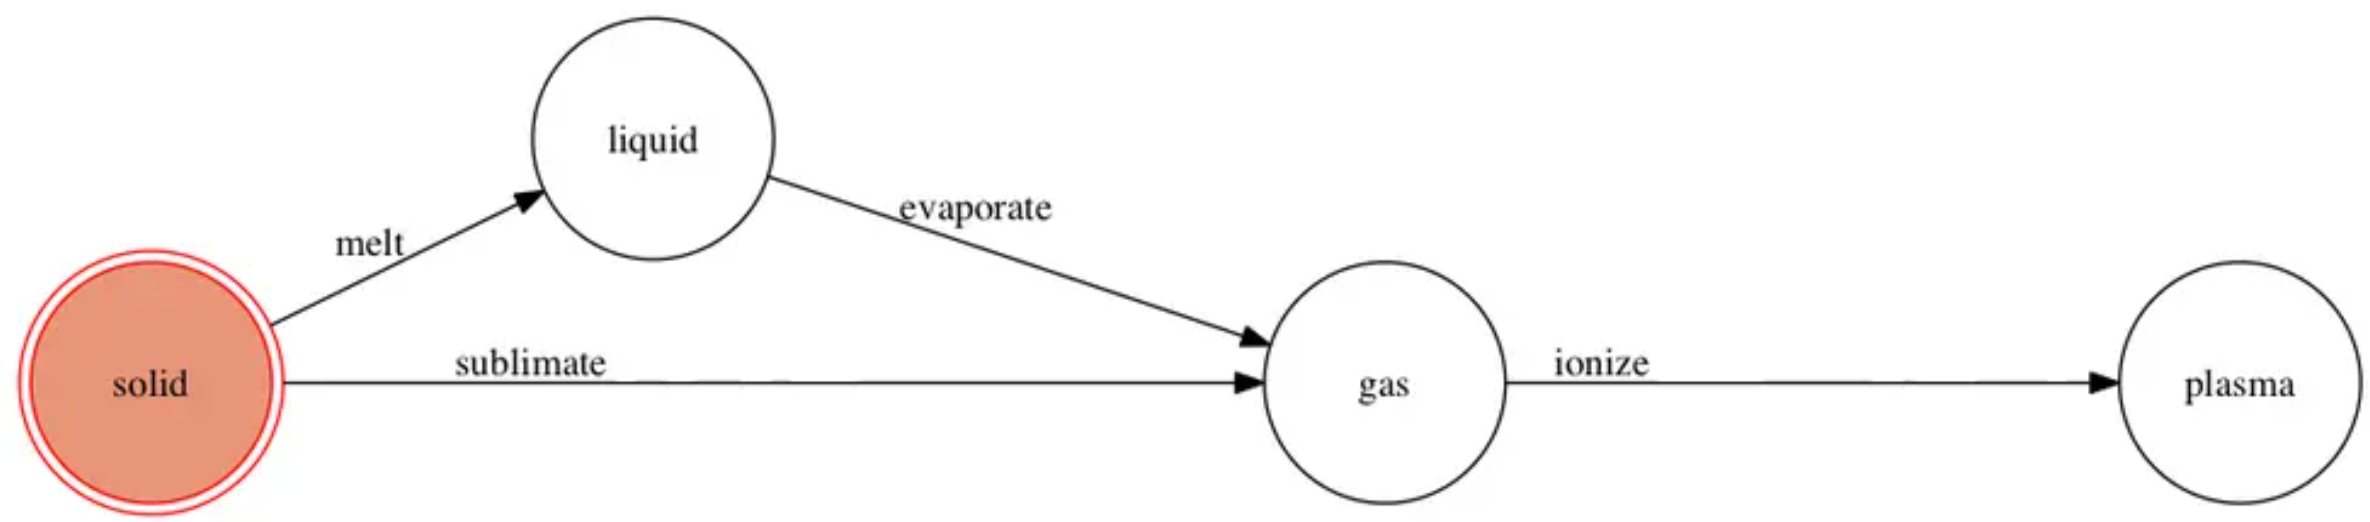

In [35]:
Image('../imgs/water.png')

In [40]:
from transitions import Machine

class Matter(object):
    pass

model = Matter()

#The states argument defines the name of states
states=['solid', 'liquid', 'gas', 'plasma']

# The trigger argument defines the name of the new triggering method
# trigger: 用来刻画分支
transitions = [
    {'trigger': 'melt', 'source': 'solid', 'dest': 'liquid' },
    {'trigger': 'evaporate', 'source': 'liquid', 'dest': 'gas'},
    {'trigger': 'sublimate', 'source': 'solid', 'dest': 'gas'},
    {'trigger': 'ionize', 'source': 'gas', 'dest': 'plasma'}]


In [45]:
machine = Machine(model=model, states=states, transitions=transitions, initial='solid')
# Test
print(model.state)    # solid
model.melt()
print(model.state)   # liquid
model.evaporate()
print(model.state)
model.ionize()
print(model.state)

solid
liquid
gas
plasma


In [46]:
machine = Machine(model=model, states=states, transitions=transitions, initial='solid')

print(model.state)    # solid
model.sublimate()
print(model.state)   # liquid
model.ionize()
print(model.state)

solid
gas
plasma
